# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage as sn
import scipy.signal as ss
import skimage
%matplotlib inline

### Reading the Mosaic Image

In [2]:
def read_image(IMG_NAME):
    # YOUR CODE HERE
    img = cv2.imread(IMG_NAME, 1)
    return img

In [3]:
IMG_DIR = 'images/'
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image(IMG_DIR+IMG_NAME)# YOUR CODE HERE
# print(mosaic_img[0, 0, 0])

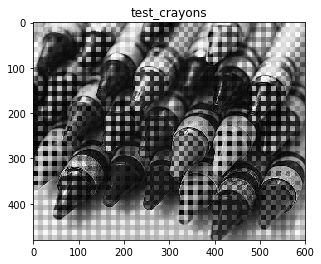

In [4]:
# For a sanity check, display your image here
cv2.imshow('image',mosaic_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(mosaic_img[:,:,::-1])
plt.title('test_crayons')
plt.show()

### Linear Interpolation

In [5]:
### HINT : You might want to use filters
    

In [6]:
### HINT : To use filters you might want to write your kernels
red_blue_kernel_4corner = np.array([[0.25, 0, 0.25], [0, 0, 0], [0.25, 0, 0.25]])
red_blue_kernel_ud = np.array([[0, 0.5, 0], [0, 0, 0], [0, 0.5, 0]])
red_blue_kernel_lr = np.array([[0, 0, 0], [0.5, 0, 0.5], [0, 0, 0]])

green_kenel = np.array([[0, 0.25, 0], [0.25, 0, 0.25], [0, 0.25, 0]])

In [7]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [8]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [9]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    ### YOUR CODE HERE ###
    
    # Red
    red_layer_correct = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    red_layer = mosaic_img[:, :, 2]
    
    red_layer_convolve_corner = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    sn.convolve(red_layer, red_blue_kernel_4corner, red_layer_convolve_corner, mode='mirror')
    red_layer_correct[::2, ::2] += red_layer_convolve_corner[::2, ::2]
    
    red_layer_convolve_lr = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    sn.convolve(red_layer, red_blue_kernel_lr, red_layer_convolve_lr, mode='mirror')
    red_layer_correct[1::2, ::2] += red_layer_convolve_lr[1::2, ::2]

    red_layer_convolve_ud = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    sn.convolve(red_layer, red_blue_kernel_ud, red_layer_convolve_ud, mode='mirror')
    red_layer_correct[::2, 1::2] += red_layer_convolve_ud[::2, 1::2]
    
    red_layer_correct[1::2, 1::2] += red_layer[1::2, 1::2]

    # Green
    green_layer_correct = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    green_layer = mosaic_img[:, :, 1]
    
    green_layer_convolve = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    sn.convolve(green_layer, green_kenel, green_layer_convolve, mode='mirror')
    green_layer_correct[::2, ::2] += green_layer_convolve[::2, ::2]
    green_layer_correct[1::2, 1::2] += green_layer_convolve[1::2, 1::2]
    green_layer_correct[::2, 1::2] += green_layer[::2, 1::2]    
    green_layer_correct[1::2, ::2] += green_layer[1::2, ::2]
    
    
    # Blue
    blue_layer_correct = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    blue_layer = mosaic_img[:, :, 0]
    
    blue_layer_convolve_corner = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    sn.convolve(blue_layer, red_blue_kernel_4corner, blue_layer_convolve_corner, mode='mirror')
    blue_layer_correct[1::2, 1::2] += blue_layer_convolve_corner[1::2, 1::2]
    
    blue_layer_convolve_lr = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    sn.convolve(blue_layer, red_blue_kernel_lr, blue_layer_convolve_lr, mode='mirror')
    blue_layer_correct[::2, 1::2] += blue_layer_convolve_lr[::2, 1::2]
    
    blue_layer_convolve_ud = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    sn.convolve(blue_layer, red_blue_kernel_ud, blue_layer_convolve_ud, mode='mirror')
    blue_layer_correct[1::2, ::2] += blue_layer_convolve_ud[1::2, ::2]
    
    blue_layer_correct[::2, ::2] += blue_layer[::2, ::2]
    
    blue_layer_correct_int = blue_layer_correct.astype(np.uint8)
    green_layer_correct_int = green_layer_correct.astype(np.uint8)
    red_layer_correct_int = red_layer_correct.astype(np.uint8)
    
    soln_image[:, :, 2] += blue_layer_correct_int
    soln_image[:, :, 1] += green_layer_correct_int
    soln_image[:, :, 0] += red_layer_correct_int
    
    soln_image = soln_image.astype(np.uint8)
    return soln_image

#mosaic_img = read_image(IMG_DIR+IMG_NAME)

#soln_image = get_solution_image(mosaic_img)
#original_image = read_image(IMG_DIR+'crayons.jpg')

#cv2.imshow('image',soln_image)
#cv2.imshow('image2',original_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [10]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    
    original_image_float = original_image.astype(np.int16)
    soln_image_float = soln_image.astype(np.int16)
    
    origin_red_channel = original_image_float[:, :, 0]
    soln_red_channel = soln_image_float[:, :, 0]
    
    origin_green_channel = original_image_float[:, :, 1]
    soln_green_channel = soln_image_float[:, :, 1]
    
    origin_blue_channel = original_image_float[:, :, 2]
    soln_blue_channel = soln_image_float[:, :, 2]
    
    ssd_red = (origin_red_channel - soln_red_channel) * (origin_red_channel - soln_red_channel)
    ssd_green =  (origin_green_channel - soln_green_channel) * (origin_green_channel - soln_green_channel)
    ssd_blue =  (origin_blue_channel - soln_blue_channel) * (origin_blue_channel - soln_blue_channel)
    
    ssd = ssd_red + ssd_green + ssd_blue
    
    
    error_map = np.zeros((np.shape(original_image)[0], np.shape(original_image)[1]))
    error_map = ssd.astype(np.uint8)
    

    
    
    pp_err = np.mean(ssd)
    max_err = np.amax(ssd)
    return pp_err, max_err, error_map

#mosaic_img = read_image(IMG_DIR+'crayons.bmp')
#soln_image = get_solution_image(mosaic_img)
#original_image = read_image(IMG_DIR+'crayons.jpg')

#pp_err, max_err = compute_errors(soln_image, original_image)

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

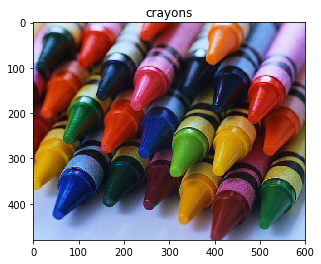

In [11]:
mosaic_img = read_image(IMG_DIR + 'crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR +'crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original',original_image)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/crayons_solution.jpg', soln_image)

plt.imshow(soln_image[:,:,::-1])
plt.title('crayons')
plt.show()

In [13]:
pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/crayons_error_map.jpg', error_map)

The average per-pixel error for crayons is: 151.1251423611111
The maximum per-pixel error for crayons is: 31853


True

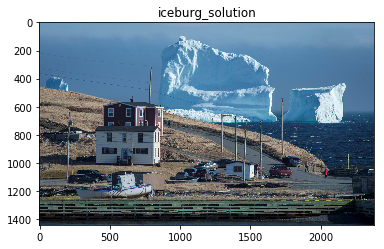

In [14]:
mosaic_img = read_image(IMG_DIR + 'iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original',original_image)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/iceburg_solution.jpg', soln_image)

plt.imshow(soln_image[:,:,::-1])
plt.title('iceburg_solution')
plt.show()

In [15]:
pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/iceburg_error_map.jpg', error_map)

The average per-pixel error for iceberg is: 105.5575730012128
The maximum per-pixel error for iceberg is: 30004


True

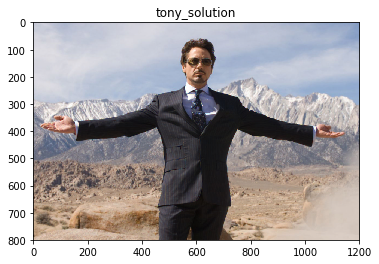

In [16]:
mosaic_img = read_image(IMG_DIR + 'tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original',original_image)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/tony_solution.jpg', soln_image)

plt.imshow(soln_image[:,:,::-1])
plt.title('tony_solution')
plt.show()

In [17]:
pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/tony_error_map.jpg', error_map)

The average per-pixel error for tony is: 23.691126041666667
The maximum per-pixel error for tony is: 9640


True

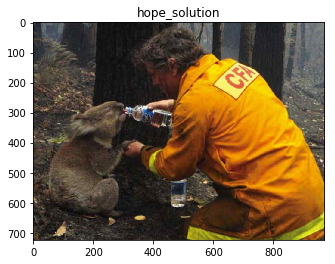

In [18]:
mosaic_img = read_image(IMG_DIR + 'hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/hope.jpg', soln_image)

plt.imshow(soln_image[:,:,::-1])
plt.title('hope_solution')
plt.show()

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [29]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    mosaic_shape = np.shape(mosaic_img)
    freeman_soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    
    linear_interpolation_img = get_solution_image(mosaic_img)
    linear_interpolation_img_float =  linear_interpolation_img.astype(np.float)
    
    red_linear_img = linear_interpolation_img_float[:, :, 0]
    green_linear_img = linear_interpolation_img_float[:, :, 1]
    blue_linear_img = linear_interpolation_img_float[:, :, 2]
    
    R_G_difference =  red_linear_img - green_linear_img
    B_G_difference = blue_linear_img - green_linear_img
    
    new_R = ss.medfilt2d(R_G_difference) + green_linear_img
    new_B = ss.medfilt2d(B_G_difference) + green_linear_img
    

    freeman_soln_image[:, :, 0] = new_R
    freeman_soln_image[:, :, 1] = green_linear_img
    freeman_soln_image[:, :, 2] = new_B
    
    np.clip(freeman_soln_image, 0, 255, out=freeman_soln_image)
    
    freeman_soln_image = freeman_soln_image.astype(np.uint8)
    return freeman_soln_image

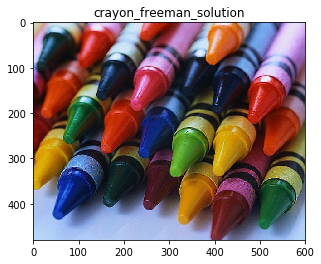

The average per-pixel error for crayons is: 109.87580208333334
The maximum per-pixel error for crayons is: 30746


True

In [30]:
### Feel free to play around with other images for Freeman's method above ###
mosaic_img = read_image(IMG_DIR + 'crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original', original_image)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/crayons_freeman_solution.jpg', soln_image)

plt.imshow(soln_image[:,:,::-1])
plt.title('crayon_freeman_solution')
plt.show()

pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/crayons_freeman_error_map.jpg', error_map)

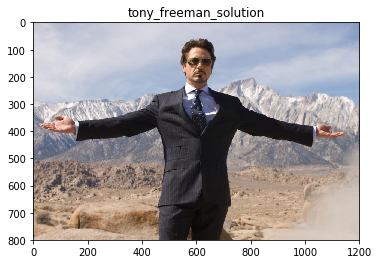

In [31]:
mosaic_img = read_image(IMG_DIR + 'tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original', original_image)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/tony_freeman_solution.jpg', soln_image)

plt.imshow(soln_image[:,:,::-1])
plt.title('tony_freeman_solution')
plt.show()

In [32]:
pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/tony_freeman_error_map.jpg', error_map)

The average per-pixel error for tony is: 15.957047916666667
The maximum per-pixel error for tony is: 10753


True

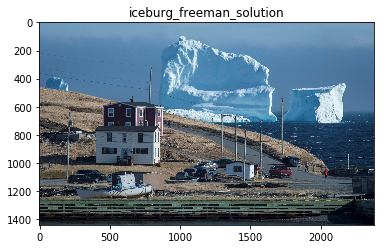

The average per-pixel error for iceberg is: 68.15849717790839
The maximum per-pixel error for iceberg is: 29493


True

In [40]:
### Feel free to play around with other images for Freeman's method above ###
mosaic_img = read_image(IMG_DIR + 'iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original', original_image)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/iceburg_freeman_solution.jpg', soln_image)

plt.imshow(soln_image[:,:,::-1])
plt.title('iceburg_freeman_solution')
plt.show()

pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/iceburg_freeman_error_map.jpg', error_map)

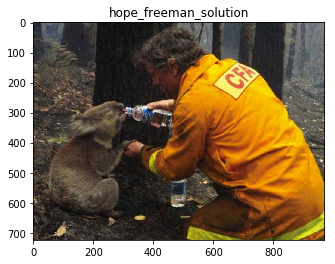

In [34]:
mosaic_img = read_image(IMG_DIR + 'hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/hope_freeman_solution.jpg', soln_image)
plt.imshow(soln_image[:,:,::-1])
plt.title('hope_freeman_solution')
plt.show()

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [35]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    original_shape = np.shape(original_image)
    mosaic_img = np.zeros((original_shape[0], original_shape[1], 3))
    
    # red
    mosaic_img[1::2, 1::2, 0] = original_image[1::2, 1::2, 0]
    mosaic_img[1::2, 1::2, 1] = original_image[1::2, 1::2, 0]
    mosaic_img[1::2, 1::2, 2] = original_image[1::2, 1::2, 0]
    #green
    mosaic_img[::2, 1::2, 0] = original_image[::2, 1::2, 1]
    mosaic_img[::2, 1::2, 1] = original_image[::2, 1::2, 1]
    mosaic_img[::2, 1::2, 2] = original_image[::2, 1::2, 1]
    
    mosaic_img[1::2, ::2, 0] = original_image[1::2, ::2, 1]
    mosaic_img[1::2, ::2, 1] = original_image[1::2, ::2, 1]
    mosaic_img[1::2, ::2, 2] = original_image[1::2, ::2, 1]
    #blue
    mosaic_img[::2, ::2, 0] = original_image[::2, ::2, 2]
    mosaic_img[::2, ::2, 1] = original_image[::2, ::2, 2]
    mosaic_img[::2, ::2, 2] = original_image[::2, ::2, 2]
    
    mosaic_img_correct = mosaic_img.astype(np.uint8)
    
    return mosaic_img_correct

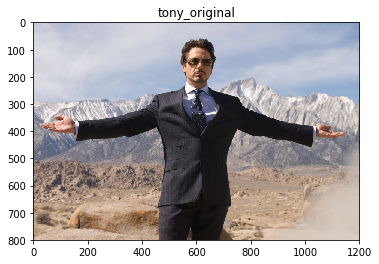

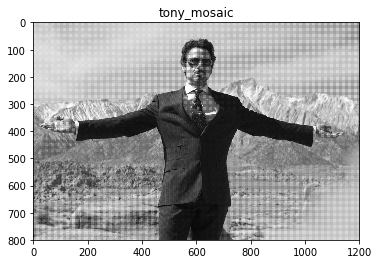

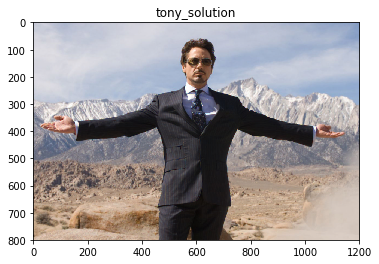

The average per-pixel error for tony is: 23.691126041666667
The maximum per-pixel error for tony is: 9640


In [36]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function
original_image = read_image(IMG_DIR + 'tony.jpg')
mosaic_img = get_mosaic_image(original_image)
soln_image = get_solution_image(mosaic_img)

# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original', original_image)
cv2.imshow('mosaic', mosaic_img)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(original_image[:,:,::-1])
plt.title('tony_original')
plt.show()
plt.imshow(mosaic_img[:,:,::-1])
plt.title('tony_mosaic')
plt.show()
plt.imshow(soln_image[:,:,::-1])
plt.title('tony_solution')
plt.show()

pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

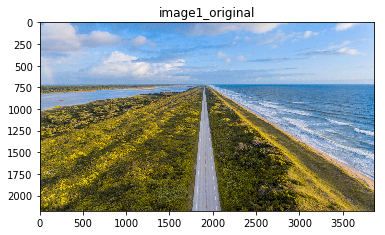

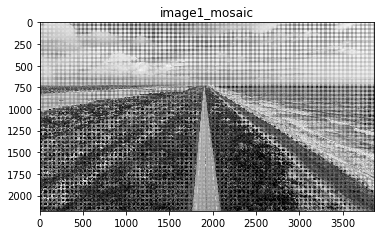

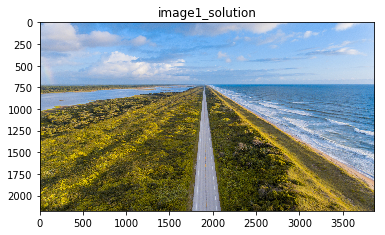

The average per-pixel error for image1 is: 42.58186634109435
The maximum per-pixel error for image1 is: 12713


True

In [37]:
### YOUR CODE HERE ###
original_image = read_image(IMG_DIR + 'image1.jpg')
mosaic_img = get_mosaic_image(original_image)
soln_image = get_freeman_solution_image(mosaic_img)

# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original', original_image)
cv2.imshow('mosaic', mosaic_img)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(original_image[:,:,::-1])
plt.title('image1_original')
plt.show()
plt.imshow(mosaic_img[:,:,::-1])
plt.title('image1_mosaic')
plt.show()
plt.imshow(soln_image[:,:,::-1])
plt.title('image1_solution')
plt.show()

pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for image1 is: "+str(pp_err))
print("The maximum per-pixel error for image1 is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/image1_freeman_error_map.jpg', error_map)

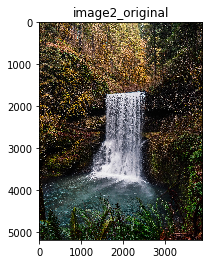

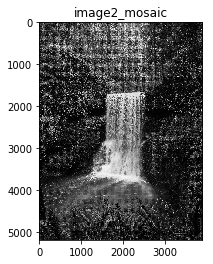

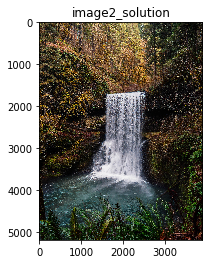

The average per-pixel error for image2 is: 211.48129527820646
The maximum per-pixel error for image2 is: 32456


True

In [38]:
original_image = read_image(IMG_DIR + 'image2.jpg')
mosaic_img = get_mosaic_image(original_image)
soln_image = get_freeman_solution_image(mosaic_img)

# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original', original_image)
cv2.imshow('mosaic', mosaic_img)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(original_image[:,:,::-1])
plt.title('image2_original')
plt.show()
plt.imshow(mosaic_img[:,:,::-1])
plt.title('image2_mosaic')
plt.show()
plt.imshow(soln_image[:,:,::-1])
plt.title('image2_solution')
plt.show()

pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for image2 is: "+str(pp_err))
print("The maximum per-pixel error for image2 is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/image2_freeman_error_map.jpg', error_map)

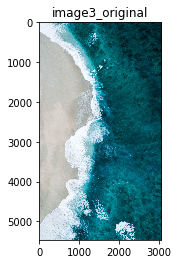

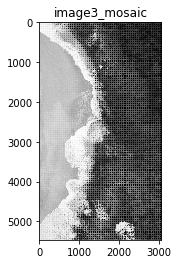

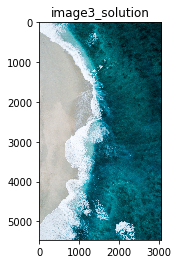

The average per-pixel error for image3 is: 22.742383668525044
The maximum per-pixel error for image3 is: 12888


True

In [39]:
original_image = read_image(IMG_DIR + 'image3.jpg')
mosaic_img = get_mosaic_image(original_image)
soln_image = get_freeman_solution_image(mosaic_img)

# For sanity check display your solution image here
### YOUR CODE
cv2.imshow('original', original_image)
cv2.imshow('mosaic', mosaic_img)
cv2.imshow('solution', soln_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(original_image[:,:,::-1])
plt.title('image3_original')
plt.show()
plt.imshow(mosaic_img[:,:,::-1])
plt.title('image3_mosaic')
plt.show()
plt.imshow(soln_image[:,:,::-1])
plt.title('image3_solution')
plt.show()

pp_err, max_err, error_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for image3 is: "+str(pp_err))
print("The maximum per-pixel error for image3 is: "+str(max_err))

cv2.imshow('error_map', error_map)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/image3_freeman_error_map.jpg', error_map)

### Bonus Points

In [ ]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####